In [55]:
import sys, os, re; sys.path = (["../src/", "../"] if re.match(r'^(\w\:\\)|(/)', os.getcwd()) else [])+ sys.path 

from typing import Any, Optional, List
import asyncio
import nest_asyncio
nest_asyncio.apply()

import qubx
%qubxd dev 

%load_ext autoreload
%autoreload 2

from qubx import lookup, logger
from qubx.core.strategy import IStrategy, StrategyContext
from qubx.impl.ccxt_connector import CCXTConnector
from qubx.utils.runner import get_account_auth

 >  [dev] installing cython rebuilding hook
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
%load_ext autoreload
%autoreload 2
from strats.teststrat import FlipFlopStrat

auth = get_account_auth('binance-mde', './configs/.env')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
cc = CCXTConnector('binance', **auth)

2024-04-11 14:24:58.566 [ ℹ️ ] BINANCE loading ...
2024-04-11 14:25:03.124 [ ℹ️ ] Loading account data for Binance
2024-04-11 14:25:03.393 [ ℹ️ ] BINANCE initialized - current time 2024-04-11T11:25:03.393655000
2024-04-11 14:25:03.401 [ ℹ️ ] BINANCE initialized - current time 2024-04-11T11:25:03.401847000


In [58]:
symbols = ['PEPE', 'SHIB', 'XVG', 'BOME', 'CKB', 'GALA', 'LINK'] 
instruments = [lookup.find_instrument('BINANCE', s, 'USDT') for s in symbols]

In [59]:
ctx = StrategyContext(
    FlipFlopStrat(), dict(
        capital_invested=100,
        trading_allowed=False
    ), 
    cc, cc, instruments=instruments,  # type: ignore
    md_subscription=dict(type='ohlc', timeframe='5Min', nback=100),
    trigger=dict(type='bar', delay='-5Sec', timeframe='1Min')
)
S = ctx.strategy

2024-04-11 14:25:05.098 [ ℹ️ ] (StrategyContext) set strategy parameters:
	set capital_invested <- 100
	set trading_allowed <- False


In [ ]:
ctx.start()

2024-04-11 14:25:11.260 [ ℹ️ ] (StrategyContext) Subscribing to ohlc updates using {'timeframe': '5Min', 'nback': 100} for 
	['PEPEUSDT', 'SHIBUSDT', 'XVGUSDT', 'BOMEUSDT', 'CKBUSDT', 'GALAUSDT', 'LINKUSDT'] 
2024-04-11 14:25:11.261 [ ℹ️ ] Subscribed on ohlc updates for 7 symbols: 
		['PEPEUSDT', 'SHIBUSDT', 'XVGUSDT', 'BOMEUSDT', 'CKBUSDT', 'GALAUSDT', 'LINKUSDT']
2024-04-11 14:25:11.263 [ ℹ️ ] > Started with capital 100
2024-04-11 14:25:11.265 [ ℹ️ ] (StrategyContext) Start processing market data
2024-04-11 14:25:11.267 [ ℹ️ ] (StrategyContext) Market data processor started


2024-04-11 14:25:14.174 [ ℹ️ ] PEPEUSDT: loaded 100 5m bars
2024-04-11 14:25:14.223 [ ℹ️ ] SHIBUSDT: loaded 100 5m bars
2024-04-11 14:25:14.241 [ ℹ️ ] XVGUSDT: loaded 100 5m bars
2024-04-11 14:25:14.261 [ ℹ️ ] BOMEUSDT: loaded 100 5m bars
2024-04-11 14:25:14.270 [ ℹ️ ] CKBUSDT: loaded 100 5m bars
2024-04-11 14:25:14.300 [ ℹ️ ] GALAUSDT: loaded 100 5m bars
2024-04-11 14:25:14.319 [ ℹ️ ] LINKUSDT: loaded 100 5m bars
2024-04-11 14:25:26.924 [ ℹ️ ] (StrategyContext) Market data processing stopped
2024-04-11 14:25:26.927 [ ℹ️ ] (CCXTConnector) PEPEUSDT OHLCV listening has been stopped
2024-04-11 14:25:26.928 [ ℹ️ ] (CCXTConnector) SHIBUSDT OHLCV listening has been stopped
2024-04-11 14:25:26.928 [ ℹ️ ] (CCXTConnector) XVGUSDT OHLCV listening has been stopped
2024-04-11 14:25:26.929 [ ℹ️ ] (CCXTConnector) BOMEUSDT OHLCV listening has been stopped
2024-04-11 14:25:26.929 [ ℹ️ ] (CCXTConnector) CKBUSDT OHLCV listening has been stopped
2024-04-11 14:25:26.930 [ ℹ️ ] (CCXTConnector) GALAUSDT OHL

In [91]:
pd.DataFrame(cc.acc.positions_report()).T

,Qty,Price,PnL,MktValue
PEPEUSDT,0.0,0.000000,0.000000,0.000000
SHIBUSDT,0.0,0.000000,0.000000,0.000000
XVGUSDT,0.0,0.000000,0.000000,0.000000
BOMEUSDT,2521.0,0.013098,-0.980669,32.039389
CKBUSDT,935.0,0.035291,-4.797485,28.199600
GALAUSDT,565.0,0.058350,0.711900,33.679650
LINKUSDT,3.0,17.582000,-0.693000,52.053000


In [63]:
ctx.get_capital()

16.65095844

In [80]:
r = cc.get_historical_ohlcs('LINKUSDT', '5Min', 10)

In [ ]:
[(oh[0] * 1_000_000, oh[1], oh[2], oh[3], oh[4], oh[6], oh[7] if len(oh) > 6 else 0) for oh in r] # type: ignore

In [ ]:
# ctx.trade('LINKUSDT', 3)

In [64]:
ctx.stop()
cc.close()

2024-04-11 14:25:26.925 [ ℹ️ ] > test is stopped


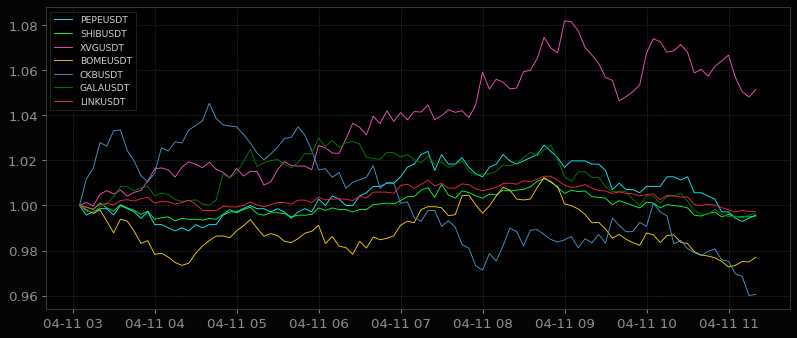

In [52]:
N = lambda x: x / x.iloc[0]
for s, hh in S.ohlcs('5Min').items():
    plt.plot(N(hh.close), label=s)
plt.legend()